In [229]:
using Plots
using JLD2
using LaTeXStrings

In [230]:
include("parameters.jl")
using .MyParams

Load data

In [231]:
script_dir = @__DIR__
plot_folder = joinpath(script_dir, "plots")
if !isdir(plot_folder)
    mkdir(plot_folder)
end

In [232]:
data_dict = Dict()
for Ω in Ω_values
    file_name = "results_data/sz_mean_steady_for_$(case)D,Ω=$(Ω).jld2"
    data_dict[Ω] = load(file_name)
end

Plots

In [233]:
default(dpi=300)

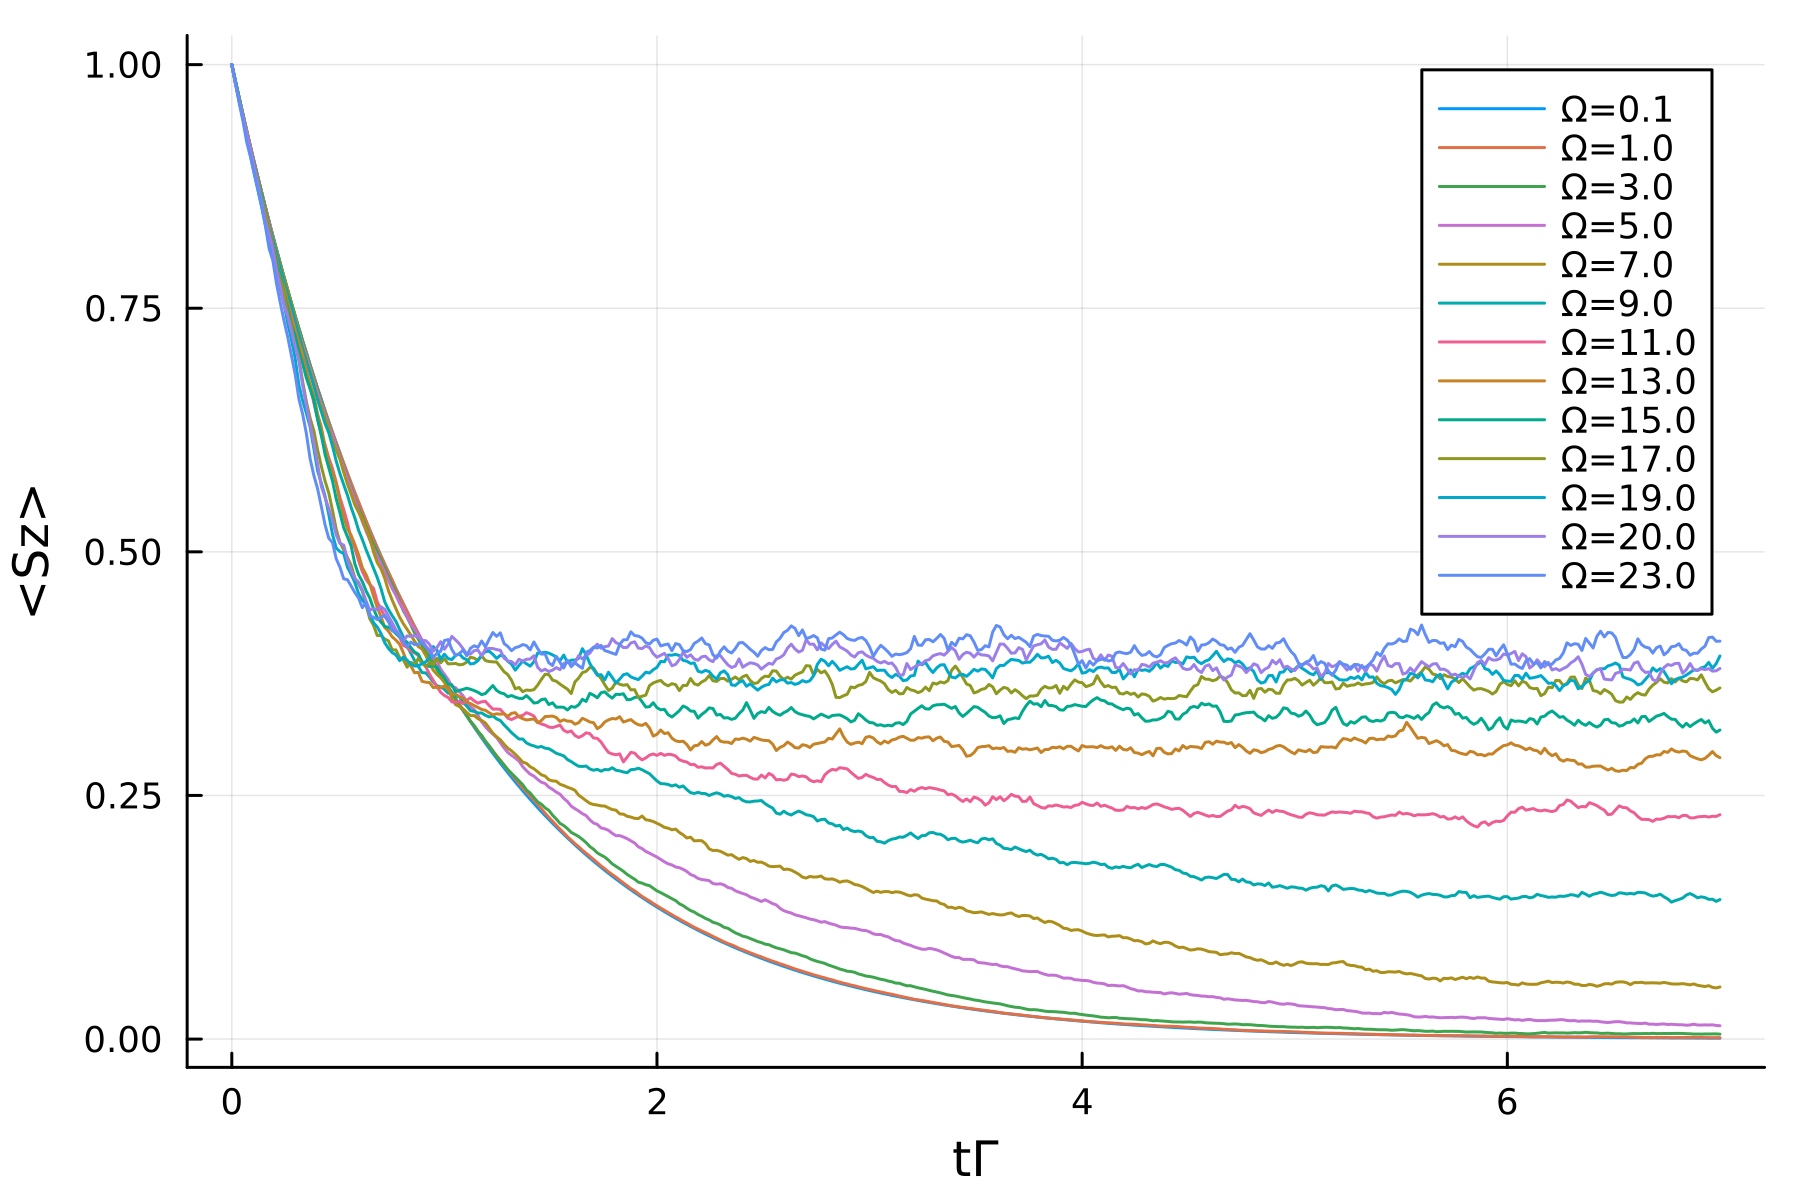

"c:\\Users\\troll\\ResearchProj\\TWA\\Rydberg_facilitation\\plots\\dynamic_rydberg_facilitation_2D,9 atoms, γ = 20, Δ = 430.png"

In [234]:
p1 = plot()
for Ω in Ω_values
    data = data_dict[Ω]
    t = data["t"]
    sz_mean_mean = vec(data["sz_mean_mean"])
    plot!(p1, t, sz_mean_mean, label="Ω=$(Ω)")
end
xlabel!(p1, "tΓ")
ylabel!(p1, "<Sz>")
display(p1)
savefig("plots/dynamic_rydberg_facilitation_$(case)D,$(MyParams.nAtoms) atoms, γ = $(MyParams.γ), Δ = $(MyParams.Δ).png")

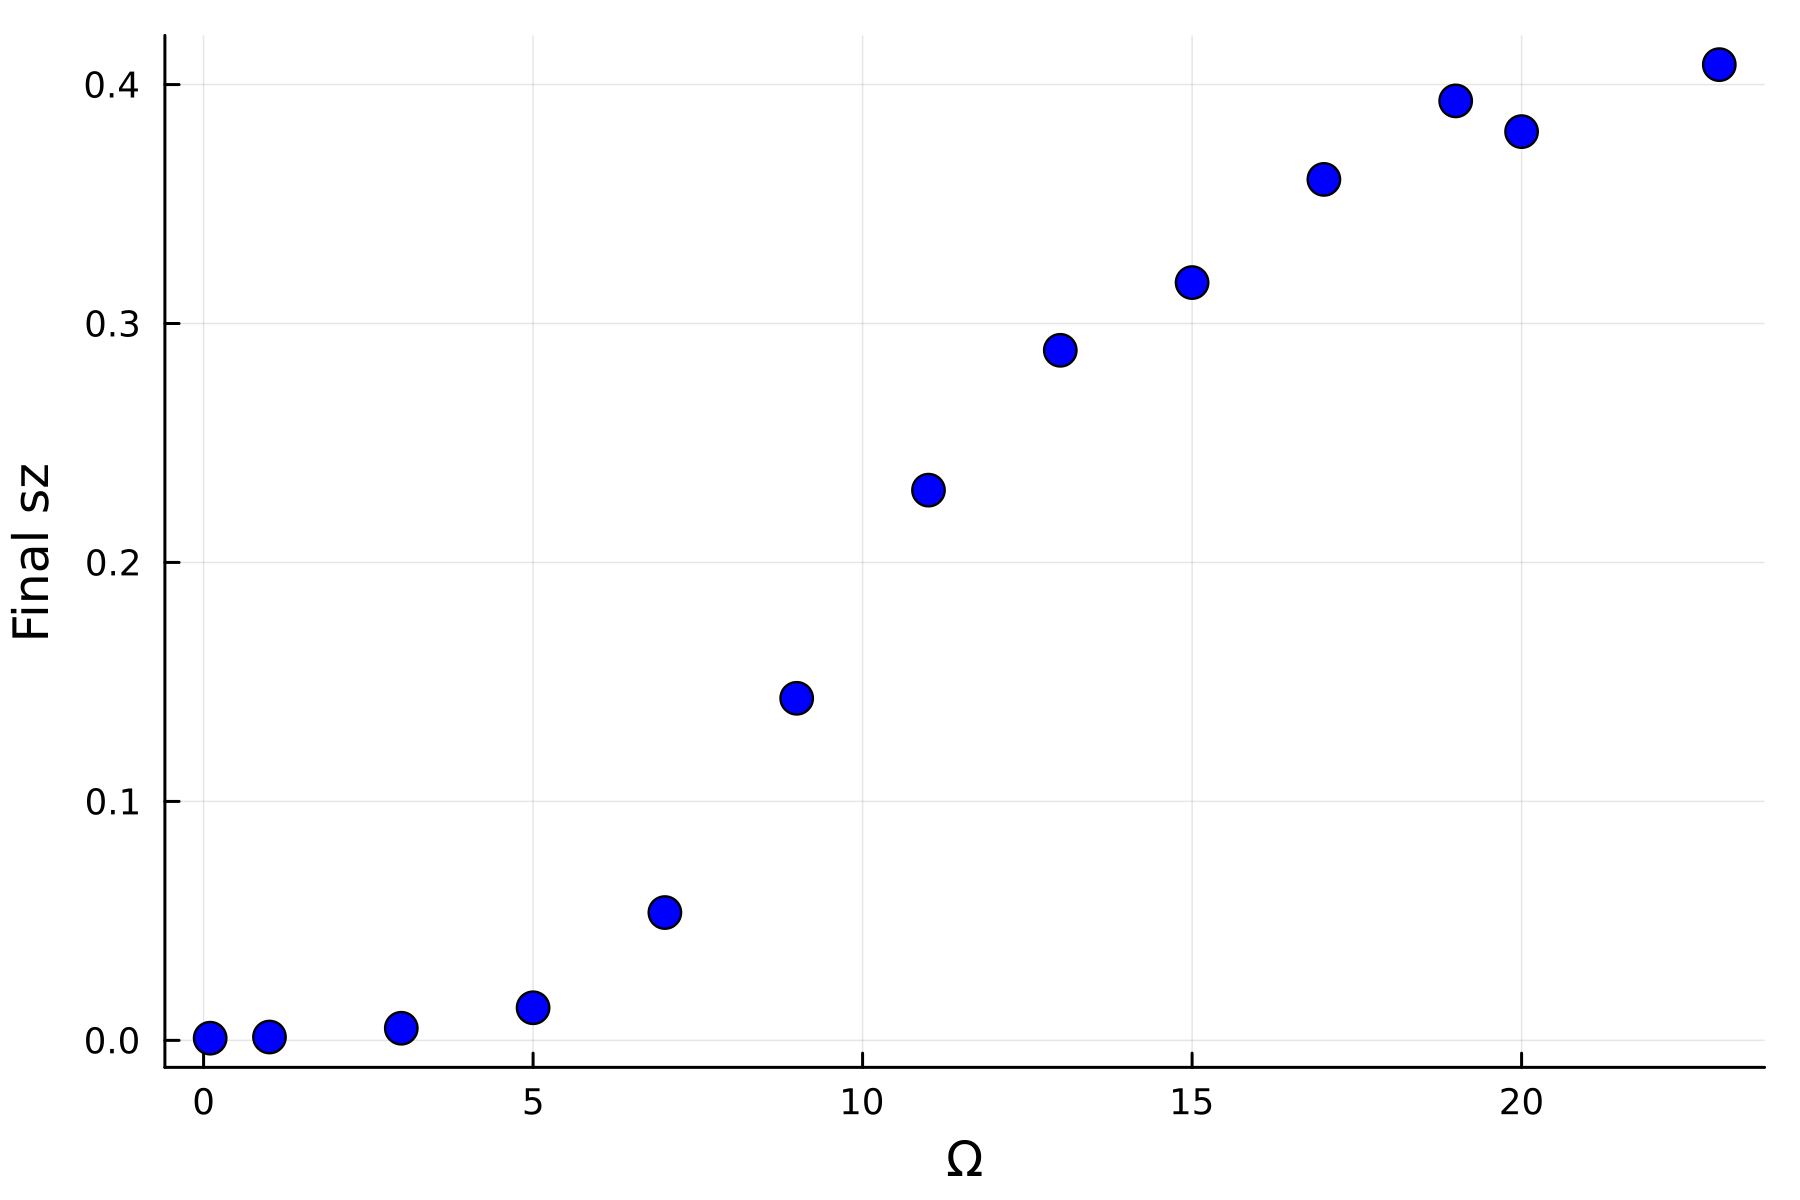

"c:\\Users\\troll\\ResearchProj\\TWA\\Rydberg_facilitation\\plots\\steady_state_rydberg_density_2D,9 atoms, γ = 20, Δ = 430.png"

In [235]:
p2 = plot()
final_sz_values = Float64[]
for Ω in Ω_values
    data = data_dict[Ω]
    t = data["t"]
    sz_mean_mean = vec(data["sz_mean_mean"])
    push!(final_sz_values, last(sz_mean_mean))
end
scatter!(
    Ω_values, final_sz_values,
    xlabel="Ω",                 # Label for the x-axis
    ylabel="Final sz",          # Label for the y-axis
    marker=:circle,             # Shape of the marker
    markersize=6,               # Size of the marker
    color=:blue,                # Color of the markers
    linestyle=:auto,            # Automatic line style (no lines)
    legend=:topright,            # Position the legend at the top right
    label=false
)
display(p2)
savefig("plots/steady_state_rydberg_density_$(case)D,$(MyParams.nAtoms) atoms, γ = $(MyParams.γ), Δ = $(MyParams.Δ).png")


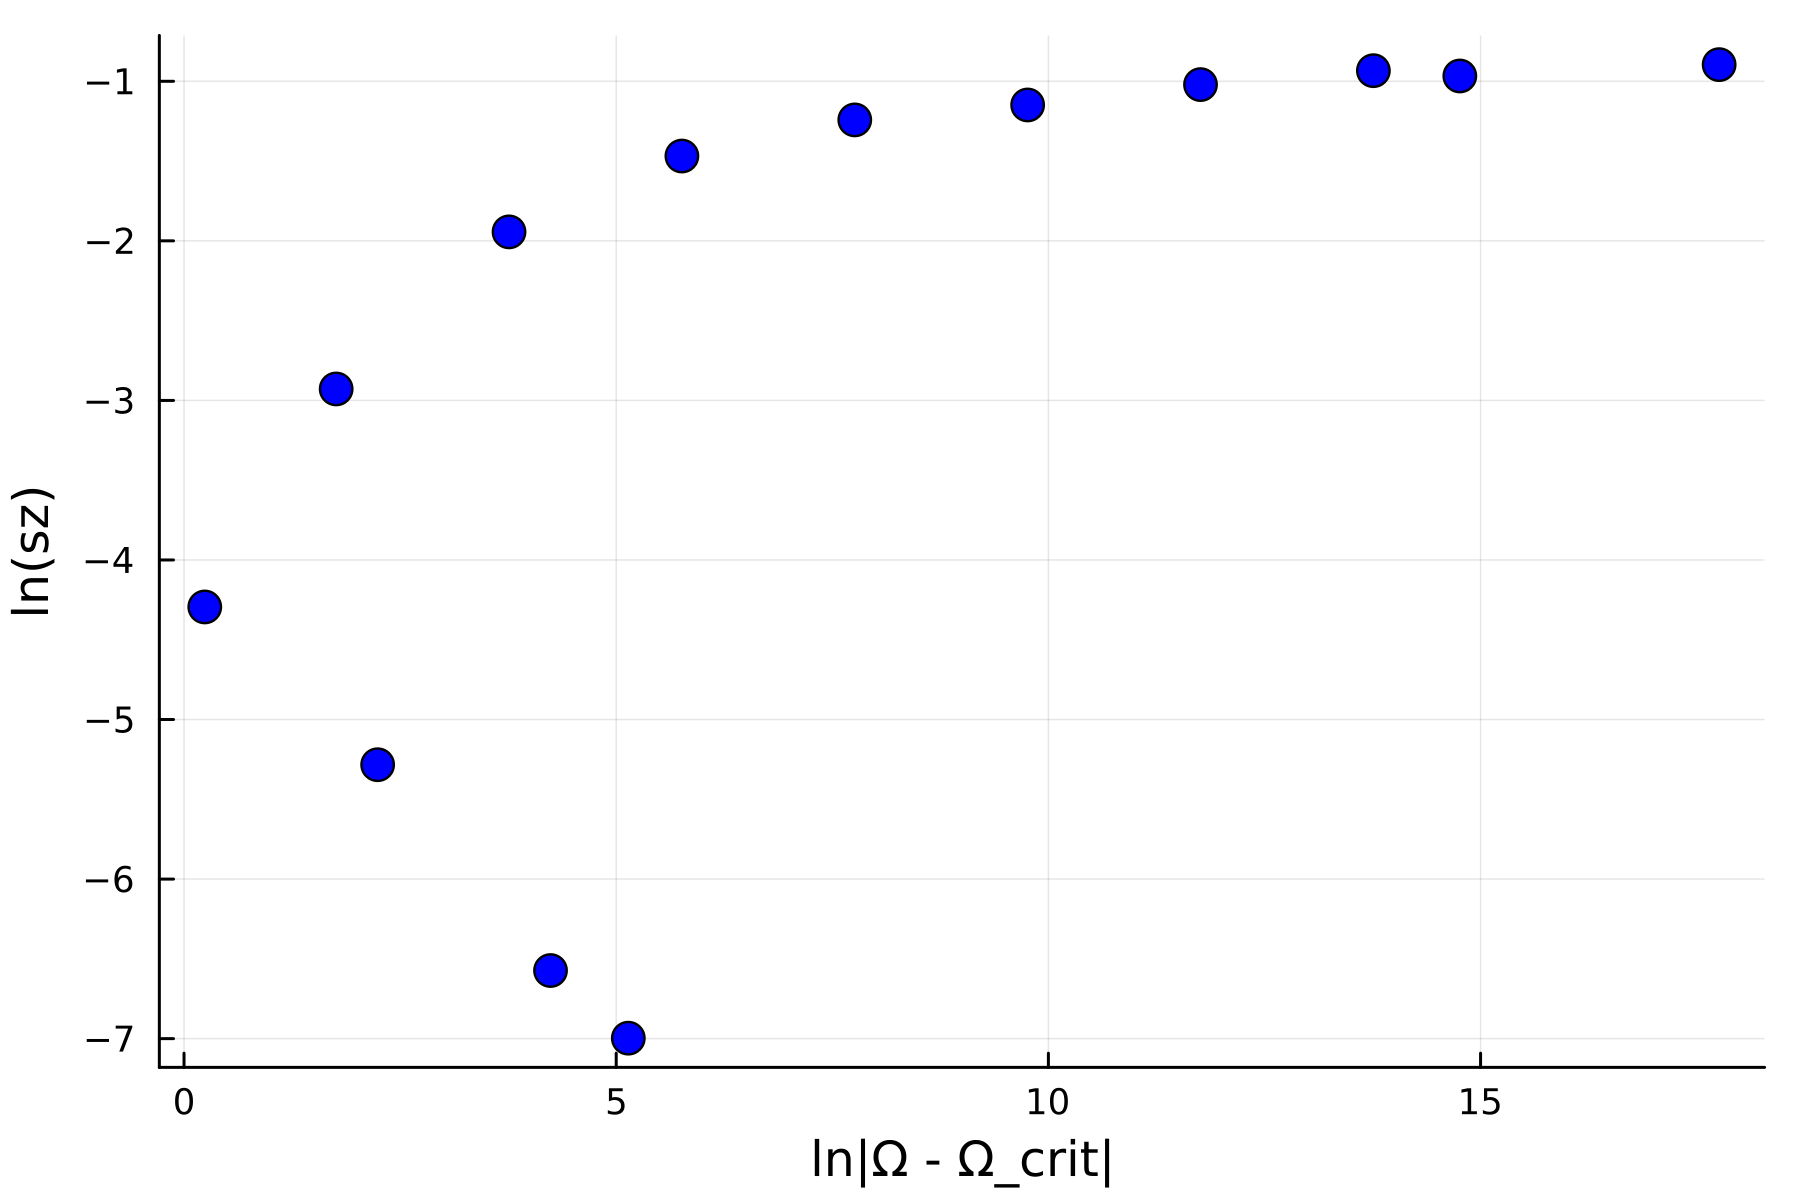

In [236]:
p3 = plot(
)
final_sz_values = Float64[]
for Ω in Ω_values
    data = data_dict[Ω]
    sz_mean_mean = vec(data["sz_mean_mean"])
    push!(final_sz_values, last(sz_mean_mean))
end
scatter!(
    abs.(Ω_values .- Ω_crit), log.(final_sz_values),
    xlabel="ln|Ω - Ω_crit|",       
    ylabel="ln(sz)",      
    marker=:circle,           
    markersize=6,             
    color=:blue,              
    linestyle=:auto,         
    legend=:topright,
    label=false,    
)
display(p3)

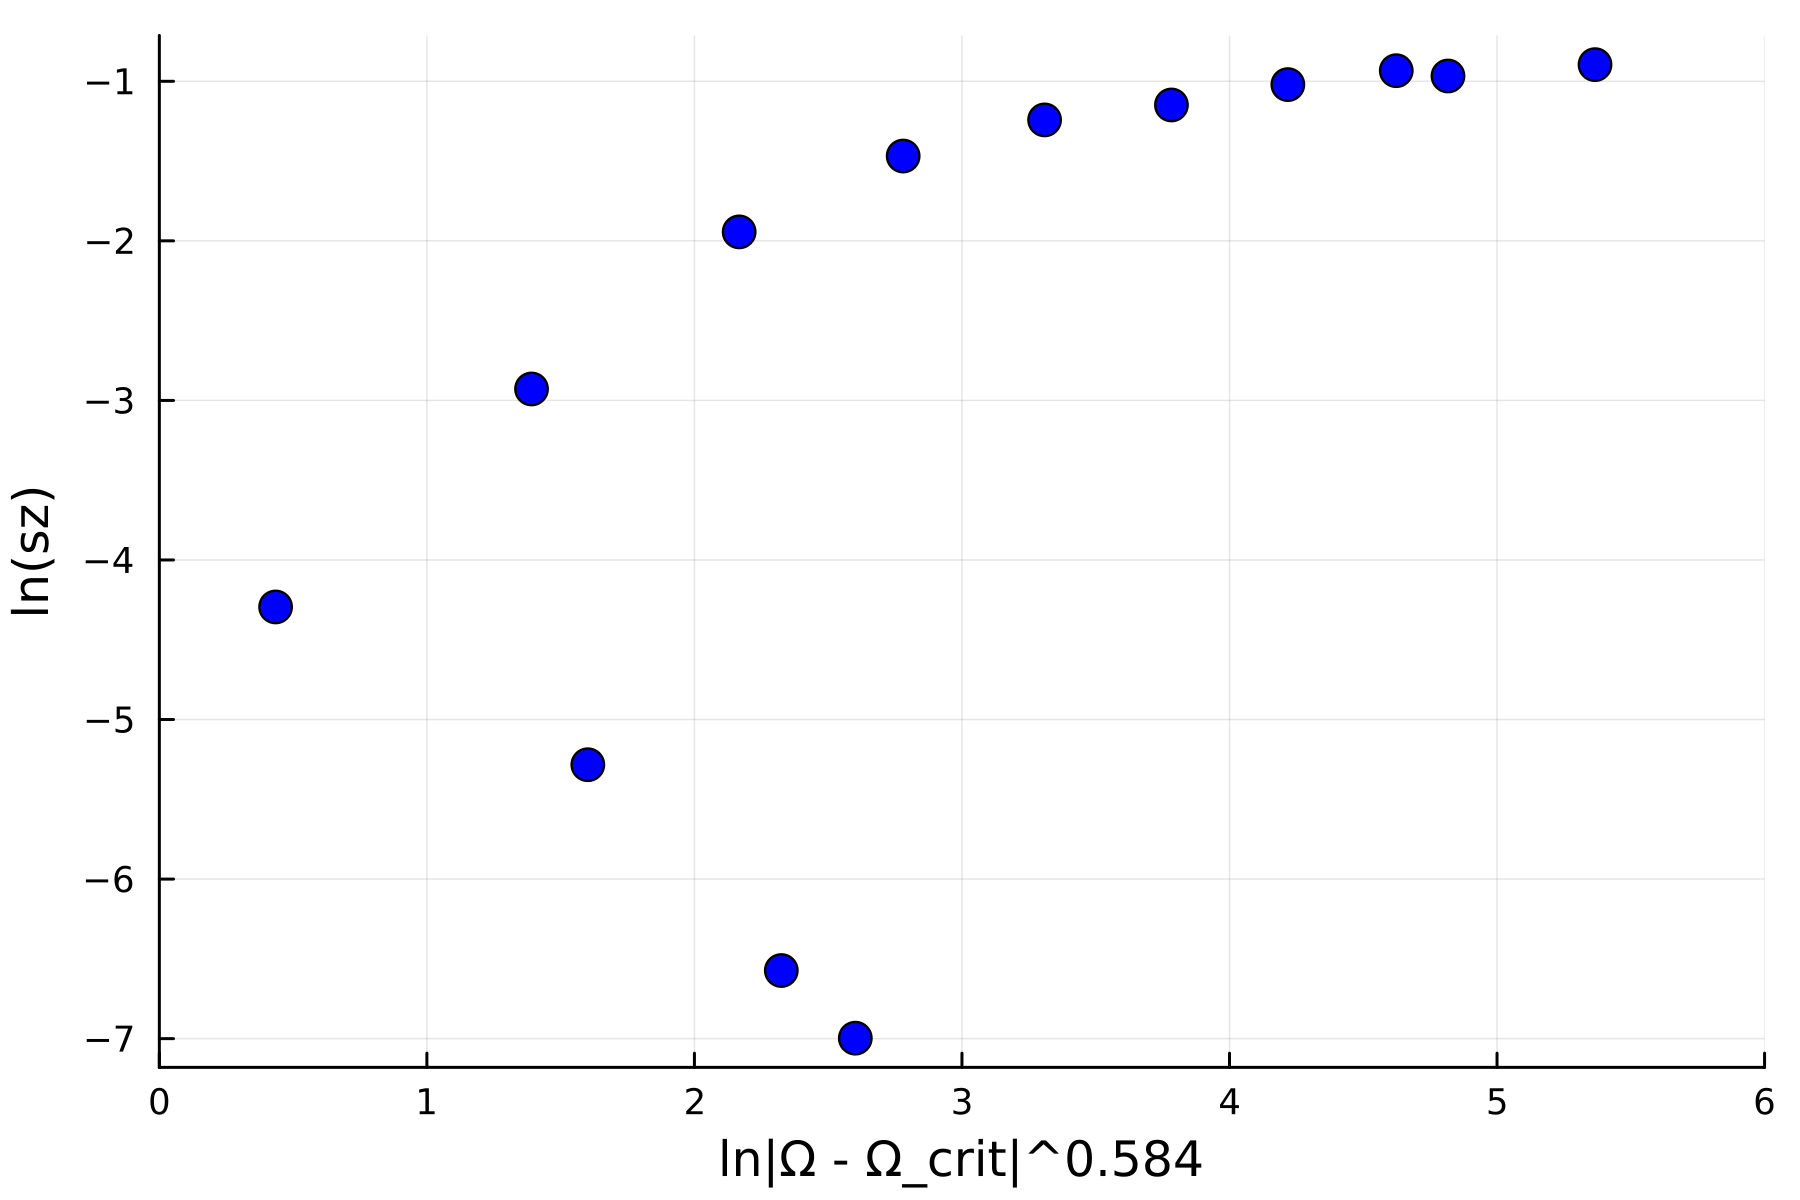

In [237]:
p4 = plot(
)
final_sz_values = Float64[]
for Ω in Ω_values
    data = data_dict[Ω]
    sz_mean_mean = vec(data["sz_mean_mean"])
    push!(final_sz_values, last(sz_mean_mean))
end
scatter!(
    abs.(Ω_values .- Ω_crit).^MyParams.beta, log.(final_sz_values),
    xlabel="ln|Ω - Ω_crit|^$(MyParams.beta)",       
    ylabel="ln(sz)",      
    marker=:circle,           
    markersize=6,             
    color=:blue,              
    linestyle=:auto,         
    legend=:topright,
    label=false,
    xlim=[0.0,6]
)
display(p4)

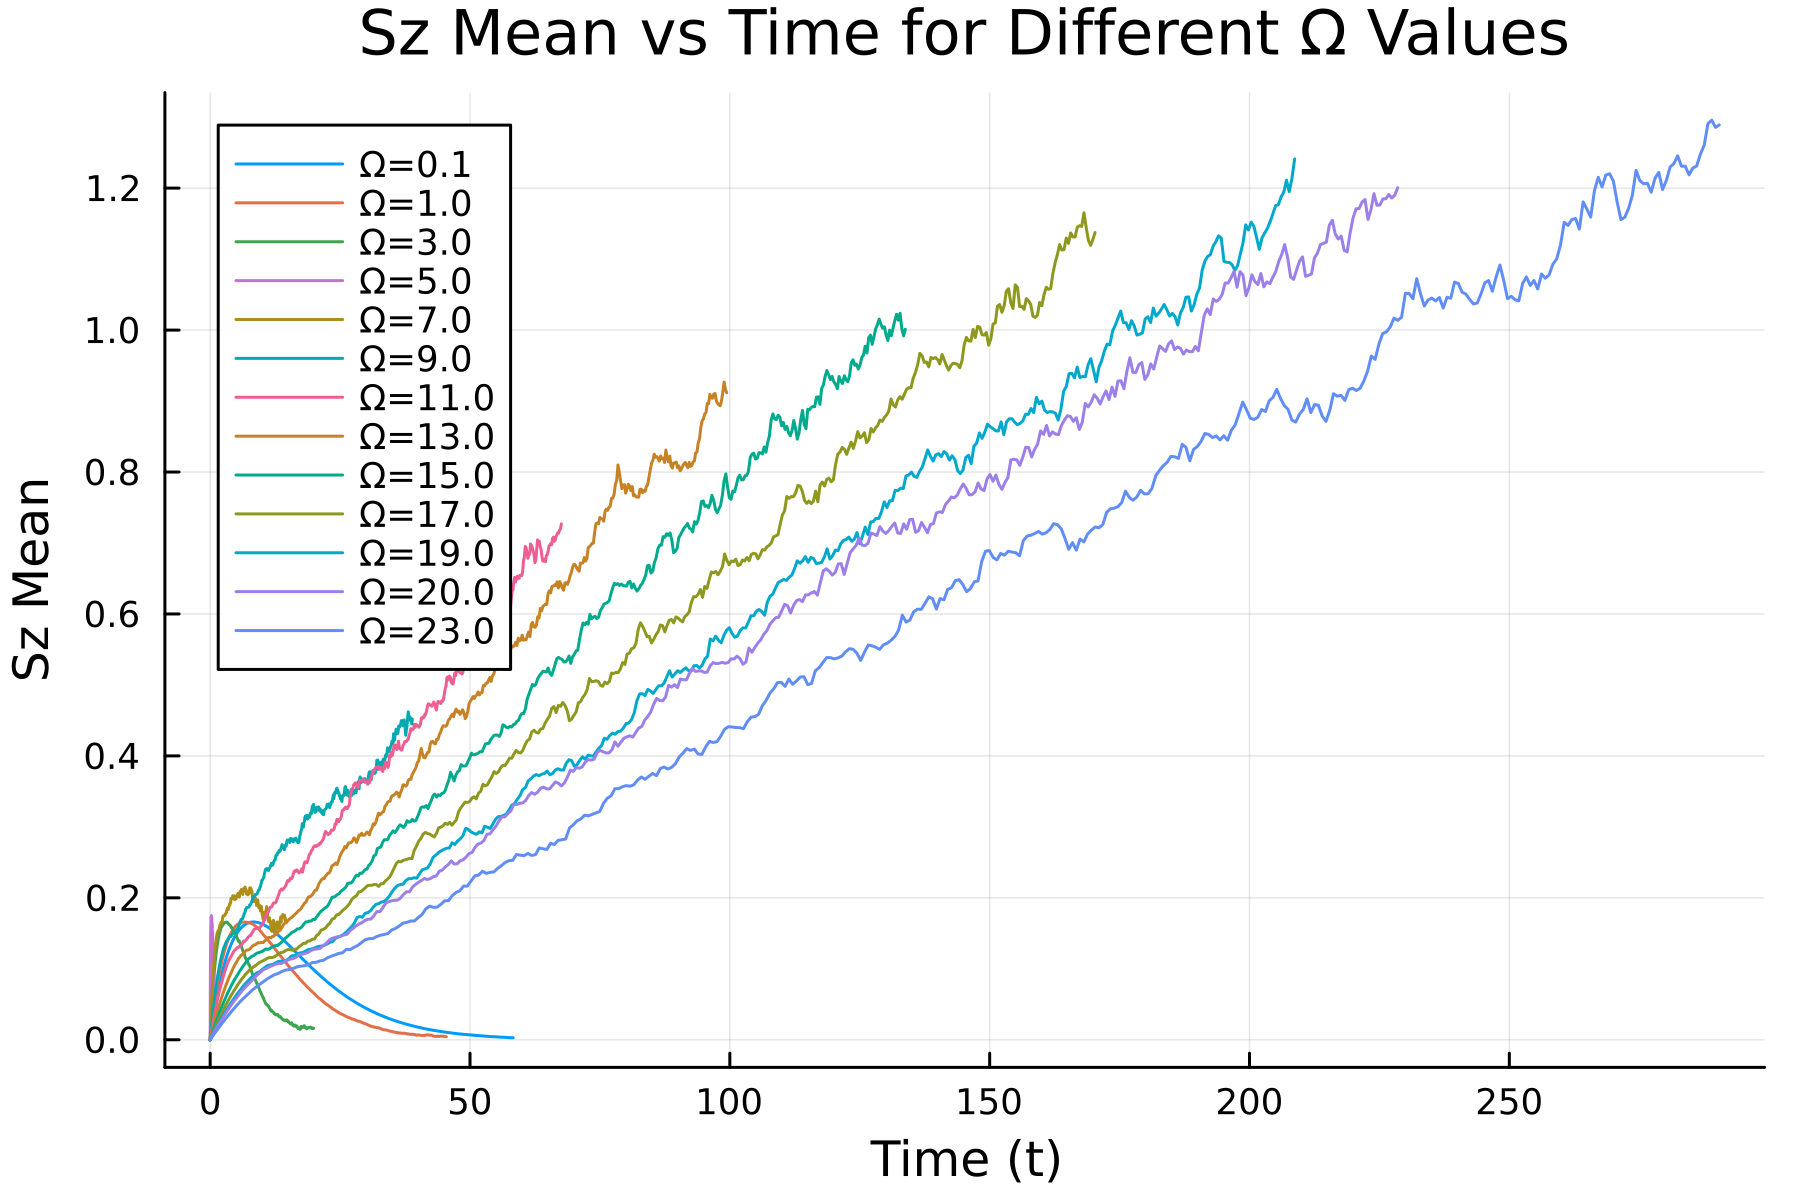

In [238]:
p5 = plot(
    
)
for Ω in Ω_values
    data = data_dict[Ω]
    t = data["t"]
    sz_mean_mean = vec(data["sz_mean_mean"])
    plot!(p5, t .* abs.(Ω - Ω_crit).^(MyParams.beta/MyParams.delta), t.* MyParams.delta .* sz_mean_mean, label="Ω=$(Ω)")
end
xlabel!(p5, "Time (t)")
ylabel!(p5, "Sz Mean")
title!(p5, "Sz Mean vs Time for Different Ω Values")
display(p5)
# savefig("plots/dynamic_rydberg_facilitation_$(case)D,$(MyParams.nAtoms) atoms, γ = $(MyParams.γ), Δ = $(MyParams.Δ).png")